In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

def load (path):
    df = pd.read_csv(path)
    return df

file_path = "/home/prathmk85/Foodpanda_MarketBasket_Project/data/Foodpanda Analysis Dataset.csv"

df = load (file_path)

df.sample(20)

,customer_id,gender,age,city,signup_date,order_id,order_date,restaurant_name,dish_name,category,quantity,price,payment_method,order_frequency,last_order_date,loyalty_points,churned,rating,rating_date,delivery_status
5448,C6534,Female,Senior,Lucknow,10/6/2023,O10534,6/12/2025,McDonald's,Burger,Italian,1,368.57,Wallet,40,11/21/2024,109,Active,NaN,1/6/2025,Cancelled
3981,C1572,Female,Teenager,Kochi,9/16/2023,O5572,12/19/2024,Pizza Hut,Pasta,Dessert,2,1011.91,Wallet,40,11/24/2024,45,Active,NaN,5/3/2025,Cancelled
3398,C2605,Female,Teenager,Pune,10/6/2023,O6605,10/6/2024,Pizza Hut,Pizza,Dessert,1,828.74,Card,30,9/15/2024,64,Inactive,5.0,8/13/2025,Delivered
2338,C1313,Other,Teenager,Pune,1/17/2024,O5313,6/5/2024,Pizza Hut,Sandwich,Continental,3,1267.47,Cash,5,8/12/2025,297,Active,2.0,8/13/2025,Delayed
5145,C6308,Other,Adult,Lucknow,2/1/2024,O10308,5/7/2025,Pizza Hut,Pizza,Continental,4,434.95,Cash,20,9/21/2024,434,Inactive,1.0,6/10/2025,Delivered
4292,C1287,Male,Senior,Indore,10/31/2024,O5287,1/25/2025,McDonald's,Sandwich,Italian,3,379.79,Wallet,36,9/7/2024,190,Active,1.0,4/16/2025,Delivered
2388,C6972,Female,Adult,Indore,11/6/2024,O10972,6/11/2024,Subway,Pasta,Chinese,4,132.31,Cash,35,3/26/2025,175,Active,NaN,1/28/2025,Cancelled
4757,C4348,Other,Senior,Kochi,5/28/2024,O8348,3/20/2025,KFC,Sandwich,Dessert,3,1412.16,Cash,37,10/30/2024,230,Active,3.0,12/11/2024,Delayed
4271,C1724,Other,Senior,Kochi,10/8/2023,O5724,1/22/2025,Burger King,Burger,Continental,2,829.76,Wallet,30,11/11/2024,26,Active,NaN,3/13/2025,Cancelled
3282,C5093,Male,Adult,Indore,2/5/2024,O9093,9/20/2024,Subway,Pasta,Chinese,4,307.43,Card,43,6/5/2025,382,Inactive,5.0,4/4/2025,Delayed


In [6]:
def encode_churned(df):

    encode_cols = ["churned"]
    
    le = LabelEncoder()
    for col in encode_cols:
        if col in df.columns:
            df[col] = le.fit_transform(df[col].astype(str))
    
    return df

df = encode_churned(df)

print("Churned encoded successfully!\n")

Churned encoded successfully!



In [7]:
def encode_age(df):

    age_mapping = {
        "teenager": 0,
        "adult": 1,
        "senior": 2
    }
    
    if "age" in df.columns:
        df["age"] = df["age"].str.lower().map(age_mapping)
    
    return df

df = encode_age(df)

print("Age column encoded successfully!\n")

Age column encoded successfully!



In [8]:
def drop_columns(df):
    return df.drop(columns=["customer_id", "order_id"], errors="ignore")

df = drop_columns(df)

print("Columns dropped successfully!\n")

Columns dropped successfully!



In [9]:
def check_nulls(df):
    return df.isnull().sum()

print("Null values in each column:\n")
print(check_nulls(df))

Null values in each column:

gender                0
age                   0
city                  0
signup_date           0
order_date            0
restaurant_name       0
dish_name             0
category              0
quantity              0
price                 0
payment_method        0
order_frequency       0
last_order_date       0
loyalty_points        0
churned               0
rating             1968
rating_date           0
delivery_status       0
dtype: int64


In [10]:
def categorical_summary(df):
    cat_cols = df.select_dtypes(include=["object", "category"]).columns
    for col in cat_cols:
        print(f"\nValue Counts for {col}:")
        print(df[col].value_counts())


print("=== Categorical Columns Summary ===")
categorical_summary(df)

=== Categorical Columns Summary ===

Value Counts for gender:
gender
Female    2018
Male      2017
Other     1965
Name: count, dtype: int64

Value Counts for city:
city
Mumbai       1256
Lucknow       1217
Pune     1195
Indore    1187
Kochi      1145
Name: count, dtype: int64

Value Counts for signup_date:
signup_date
10/18/2023    18
1/26/2025     16
7/18/2025     16
12/30/2024    16
5/25/2025     16
              ..
4/1/2025       2
1/4/2025       2
5/21/2025      2
11/23/2023     2
9/22/2023      2
Name: count, Length: 730, dtype: int64

Value Counts for order_date:
order_date
9/8/2024      20
9/12/2024     17
10/16/2023    17
2/16/2025     16
6/9/2025      16
              ..
5/11/2024      2
11/5/2023      2
5/12/2025      2
2/12/2025      2
11/21/2023     1
Name: count, Length: 730, dtype: int64

Value Counts for restaurant_name:
restaurant_name
Subway         1260
KFC            1224
Pizza Hut      1224
Burger King    1151
McDonald's     1141
Name: count, dtype: int64

Value Cou

In [11]:
def numerical_summary(df):
    print("\nNumerical Columns Summary:\n")
    print(df.describe())


print("\n=== Numerical Columns Summary ===")
numerical_summary(df)


=== Numerical Columns Summary ===

Numerical Columns Summary:

               age     quantity        price  order_frequency  loyalty_points  \
count  6000.000000  6000.000000  6000.000000      6000.000000     6000.000000   
mean      0.982000     2.991667   800.524880        25.304667      250.173667   
std       0.817998     1.414778   404.855029        14.358930      144.608478   
min       0.000000     1.000000   100.300000         1.000000        0.000000   
25%       0.000000     2.000000   441.997500        13.000000      125.000000   
50%       1.000000     3.000000   806.460000        25.000000      249.500000   
75%       2.000000     4.000000  1149.737500        37.000000      378.000000   
max       2.000000     5.000000  1499.950000        50.000000      500.000000   

           churned       rating  
count  6000.000000  4032.000000  
mean      0.497333     3.012153  
std       0.500035     1.411615  
min       0.000000     1.000000  
25%       0.000000     2.000000  
50

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           6000 non-null   object 
 1   age              6000 non-null   int64  
 2   city             6000 non-null   object 
 3   signup_date      6000 non-null   object 
 4   order_date       6000 non-null   object 
 5   restaurant_name  6000 non-null   object 
 6   dish_name        6000 non-null   object 
 7   category         6000 non-null   object 
 8   quantity         6000 non-null   int64  
 9   price            6000 non-null   float64
 10  payment_method   6000 non-null   object 
 11  order_frequency  6000 non-null   int64  
 12  last_order_date  6000 non-null   object 
 13  loyalty_points   6000 non-null   int64  
 14  churned          6000 non-null   int64  
 15  rating           4032 non-null   float64
 16  rating_date      6000 non-null   object 
 17  delivery_statu

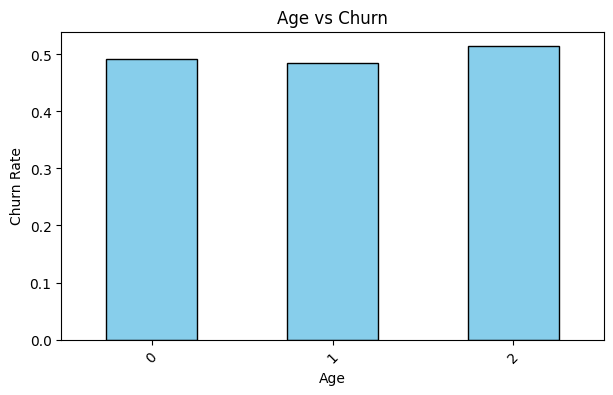

In [13]:
def plot_churn_vs_age(df, feature, title):
   
    churn_rate = df.groupby("age")["churned"].mean()
    churn_rate.plot(kind="bar", figsize=(7,4), color="skyblue", edgecolor="black")
    plt.title("Age vs Churn")
    plt.ylabel("Churn Rate")
    plt.xlabel(feature.capitalize())
    plt.xticks(rotation=45)
    plt.show()

plot_churn_vs_age(df, "age", "Age vs Churn Rate")

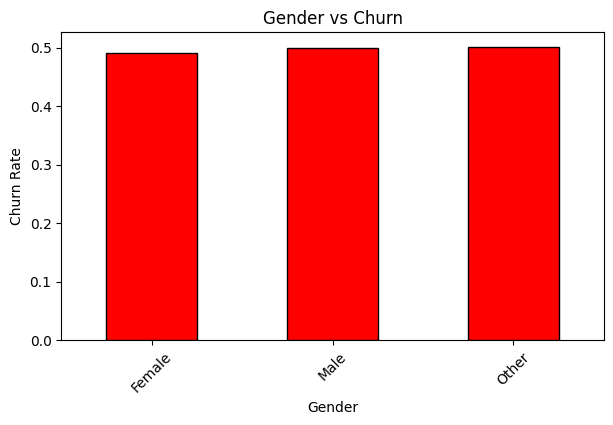

In [14]:
def plot_churn_vs_gender(df, feature, title):
   
    churn_rate = df.groupby("gender")["churned"].mean()
    churn_rate.plot(kind="bar", figsize=(7,4), color="red", edgecolor="black")
    plt.title("Gender vs Churn")
    plt.ylabel("Churn Rate")
    plt.xlabel(feature.capitalize())
    plt.xticks(rotation=45)
    plt.show()

plot_churn_vs_gender(df, "gender", "Gender vs Churn Rate")

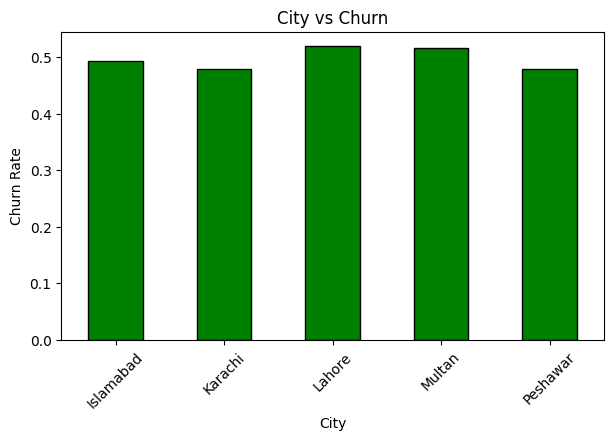

In [15]:
def plot_churn_vs_city(df, feature, title):
   
    churn_rate = df.groupby("city")["churned"].mean()
    churn_rate.plot(kind="bar", figsize=(7,4), color="green", edgecolor="black")
    plt.title("City vs Churn")
    plt.ylabel("Churn Rate")
    plt.xlabel(feature.capitalize())
    plt.xticks(rotation=45)
    plt.show()

plot_churn_vs_city(df, "city", "City vs Churn Rate")

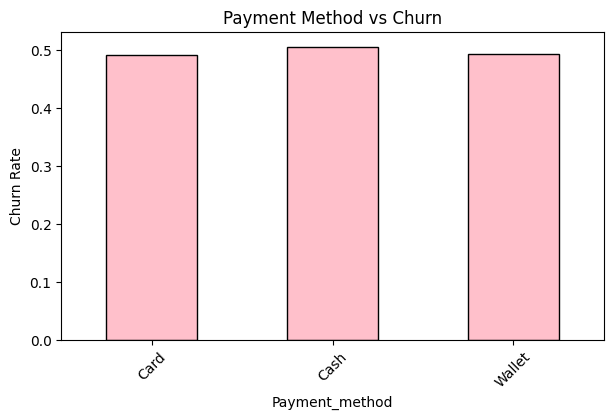

In [16]:
def plot_churn_vs_pm(df, feature, title):
   
    churn_rate = df.groupby("payment_method")["churned"].mean()
    churn_rate.plot(kind="bar", figsize=(7,4), color="pink", edgecolor="black")
    plt.title("Payment Method vs Churn")
    plt.ylabel("Churn Rate")
    plt.xlabel(feature.capitalize())
    plt.xticks(rotation=45)
    plt.show()

plot_churn_vs_pm(df, "payment_method", "Payment Method vs Churn Rate")

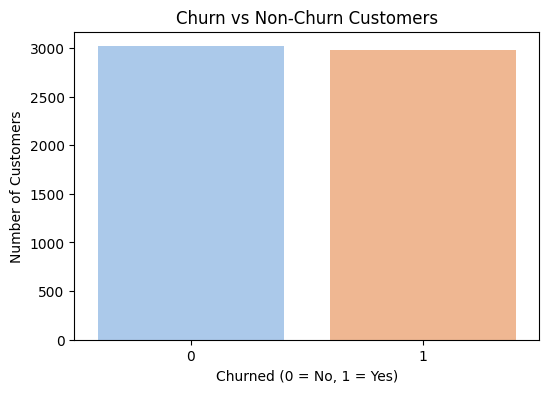

In [17]:
def plot_churn_distribution(df):

    plt.figure(figsize=(6,4))
    sns.countplot(x="churned", data=df, palette="pastel")
    plt.title("Churn vs Non-Churn Customers")
    plt.xlabel("Churned (0 = No, 1 = Yes)")
    plt.ylabel("Number of Customers")
    plt.show()

plot_churn_distribution(df)

In [18]:
def create_date_features(df):
    # Convert date columns to datetime
    date_cols = ["signup_date", "order_date", "last_order_date", "rating_date"]
    for col in date_cols:
        df[col] = pd.to_datetime(df[col], errors="coerce")
    
    # Today reference date
    today = pd.to_datetime("today")
    
    # Feature engineering
    df["tenure_days"] = (df["last_order_date"] - df["signup_date"]).dt.days
    df["recency_days"] = (today - df["last_order_date"]).dt.days
    df["rating_recency"] = (today - df["rating_date"]).dt.days
    
    # Order frequency (per month)
    df["order_per_month"] = df["order_frequency"] / ((df["tenure_days"]/30).replace(0,1))
    
    # Average order gap
    df["avg_order_gap"] = (df["tenure_days"] / df["order_frequency"]).replace([float("inf"), -float("inf")], 0)
    
    return df

# Apply
df = create_date_features(df)
print(df[["tenure_days", "recency_days", "rating_recency", "order_per_month", "avg_order_gap"]].head())

   tenure_days  recency_days  rating_recency  order_per_month  avg_order_gap
0          552            73             351         2.065217      14.526316
1          141           309              40         5.106383       5.875000
2          -41           143             376       -30.731707      -0.976190
3          688            68              93         1.177326      25.481481
4          358           283             208         2.932961      10.228571


In [19]:
# 1. Drop datetime columns (or convert them separately to numeric features if needed)
df = df.drop(columns=["signup_date", "order_date", "last_order_date", "rating_date"])

# 2. Handle missing values
# Example: fill ratings with median
df["rating"] = df["rating"].fillna(df["rating"].median())

# 3. Split features and target
X = df.drop(columns=["churned"])
y = df["churned"]

# 4. One-hot encode categorical columns
cat_cols = X.select_dtypes(include=["object"]).columns
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
def train_random_forest(X_train, X_test, y_train, y_test, n_estimators=100, random_state=42):
   
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        random_state=random_state,
        n_jobs=-1,
        class_weight='balanced'  
    )
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    
    # Evaluation
    print("=== Random Forest Evaluation ===\n")
    print(f"Accuracy  : {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision : {precision_score(y_test, y_pred):.4f}")
    print(f"Recall    : {recall_score(y_test, y_pred):.4f}")
    print(f"F1-score  : {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC   : {roc_auc_score(y_test, y_prob):.4f}\n")
    
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred), "\n")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    return model

# Train and evaluate
rf_model = train_random_forest(X_train, X_test, y_train, y_test)

=== Random Forest Evaluation ===

Accuracy  : 0.4958
Precision : 0.4923
Recall    : 0.4288
F1-score  : 0.4584
ROC-AUC   : 0.4953

Confusion Matrix:
 [[339 264]
 [341 256]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.56      0.53       603
           1       0.49      0.43      0.46       597

    accuracy                           0.50      1200
   macro avg       0.50      0.50      0.49      1200
weighted avg       0.50      0.50      0.49      1200



In [20]:
def train_xgboost(X_train, X_test, y_train, y_test, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42):
  
    model = xgb.XGBClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        random_state=random_state,
        use_label_encoder=False,
        eval_metric='logloss',
        scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1])  # handle imbalance
    )
    
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    
    # Evaluation
    print("=== XGBoost Evaluation ===\n")
    print(f"Accuracy  : {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision : {precision_score(y_test, y_pred):.4f}")
    print(f"Recall    : {recall_score(y_test, y_pred):.4f}")
    print(f"F1-score  : {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC   : {roc_auc_score(y_test, y_prob):.4f}\n")
    
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred), "\n")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    return model

# Train and evaluate
xgb_model = train_xgboost(X_train, X_test, y_train, y_test)

/home/prathmk85/miniconda3/envs/tf/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [15:12:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


=== XGBoost Evaluation ===

Accuracy  : 0.5358
Precision : 0.5348
Recall    : 0.5142
F1-score  : 0.5243
ROC-AUC   : 0.5428

Confusion Matrix:
 [[336 267]
 [290 307]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.56      0.55       603
           1       0.53      0.51      0.52       597

    accuracy                           0.54      1200
   macro avg       0.54      0.54      0.54      1200
weighted avg       0.54      0.54      0.54      1200



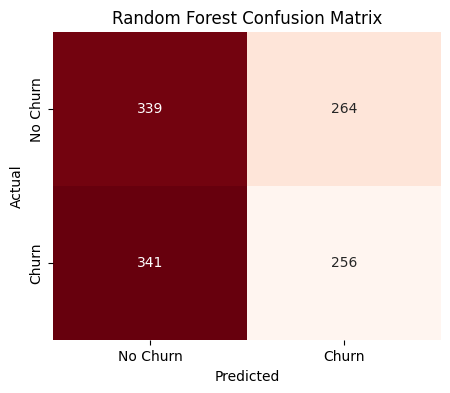

In [23]:
def plot_confusion_matrix(model, X_test, y_test, title="Confusion Matrix"):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Reds", cbar=False,
                xticklabels=["No Churn", "Churn"],
                yticklabels=["No Churn", "Churn"])
    
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

plot_confusion_matrix(rf_model, X_test, y_test, title="Random Forest Confusion Matrix")

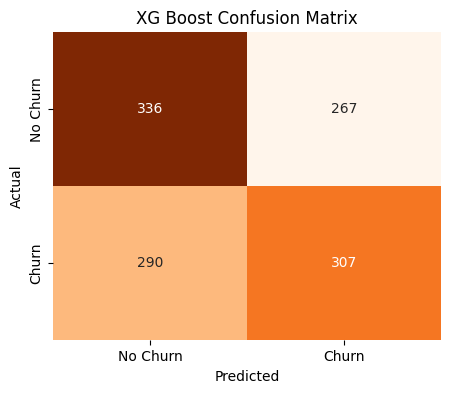

In [24]:
def plot_confusion_matrix(model, X_test, y_test, title="Confusion Matrix"):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Oranges", cbar=False,
                xticklabels=["No Churn", "Churn"],
                yticklabels=["No Churn", "Churn"])
    
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

plot_confusion_matrix(xgb_model, X_test, y_test, title="XG Boost Confusion Matrix")

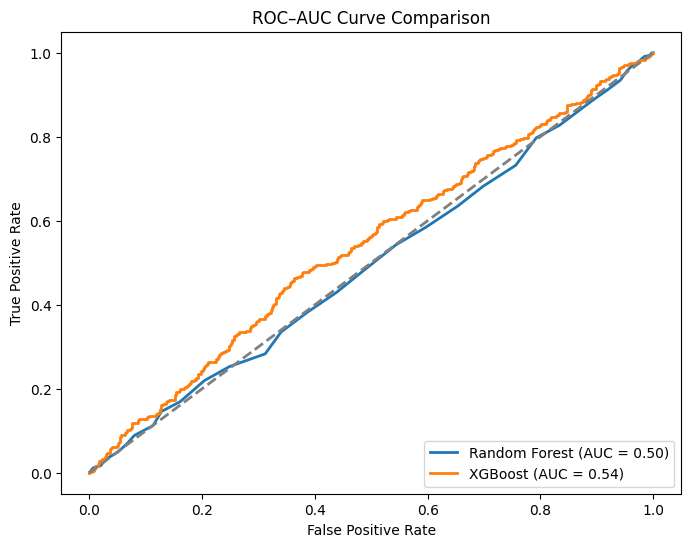

In [25]:
def plot_roc_auc(models, X_test, y_test):
    plt.figure(figsize=(8,6))
    
    for name, model in models.items():
        # Probability predictions
        y_proba = model.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.2f})")
    
    # Random baseline
    plt.plot([0,1], [0,1], color="gray", lw=2, linestyle="--")
    
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC–AUC Curve Comparison")
    plt.legend(loc="lower right")
    plt.show()

models = {   
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

plot_roc_auc(models, X_test, y_test)